## **ML :** Customer Churn

#### _Customer Churn Dataset_

🟠 `on work`

---

1. **Preprocessing**
    * Extractions des variables
    * Nettoyage des données
    * Encodage des variables quantitatives
    * Proto-modélisation
    * Supression des valeurs aberrantes
    * Feature Selection
    * Feature Engineering
    * Feature Scaling
2. **Modeling**
    * Fonction d’évaluation
    * Entrainements multiples modèles
    * Optimisation
    * Analyse des erreurs
    * Courbe d'aprentissage
    * Décision

**Built-in**

In [ ]:
# Built-in Modules from Python

**Librairies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**ML objects**

In [44]:
# Models
# • DecisionTree
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import plot_tree
# • RandomForest
# from sklearn.ensemble import RandomForestClassifier
# - -
# Evaluation, tuning, etc.
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# - -
# Metrics
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import average_precision_score
# from sklearn.metrics import precision_score

**User functions**

In [ ]:
# Useful functions for ML

**Notebook setup**

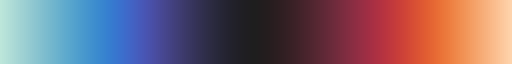

In [3]:
# Colour codes
mean_c = '#FFFFFF'
median_c = '#c2e800'
default_c = '#336699'
palette_c = [
    '#b8e600', # Limon
    '#e60073' # Magenta
]

# Pandas
pd.options.display.max_rows = 30
pd.options.display.min_rows = 6

# Matplotlib
plt.style.use('dark_background')

plt.rcParams['figure.facecolor'] = '#242428'
plt.rcParams['axes.facecolor'] = '#242428'
plt.rcParams['axes.titleweight'] = 'bold'

# Seaborn : display crest, mako, rocket, ...
sns.color_palette("icefire", as_cmap=True)

**Iris dataset**

(_no-url_)

In [ ]:
theme_file_path = '../_datasets/theme_data_prepared.csv'
theme_data = pd.read_csv(theme_file_path)
theme_data['target'] = theme_data['target'].astype('category')

theme_data

---

### **1.** Preprocessing

##### **1.1** - Extraction de variables

Extraction des _Features_ et du _Label_

In [10]:
# (!) - 'target' est la cible de prédiction
y = iris_data['target']

y.unique()

['setosa', 'virsicolor', 'virginica']
Categories (3, object): ['setosa', 'virginica', 'virsicolor']

In [11]:
# (!) - Toutes les colonnes sont des Features sauf 'target'
X = iris_data.drop(columns='target')

X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


Isolation des données d'entrainement et de test

In [12]:
# (!) - Isolation de 25 % des données pour la validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=5)

display(
    X_train.shape,
    X_test.shape
)

(112, 4)

(38, 4)

In [13]:
# (!) - Les cibles disposent bien de 3 catégories
display(
    y_train.unique(),
    y_test.unique()
)

['setosa', 'virginica', 'virsicolor']
Categories (3, object): ['setosa', 'virginica', 'virsicolor']

['virsicolor', 'virginica', 'setosa']
Categories (3, object): ['setosa', 'virginica', 'virsicolor']

In [14]:
# (!) - Répartition presque équitable, plus de 'virsicolor' dans le test set
display(
    y_train.describe(),
    y_test.describe()
)

count        112
unique         3
top       setosa
freq          38
Name: target, dtype: object

count             38
unique             3
top       virsicolor
freq              14
Name: target, dtype: object

##### **1.2** - ~~Nettoyage des données~~

##### **1.3** - Proto-modélisation

Définition et entrainement

In [15]:
# (!) - Les prédictions concernent une classification
draft_DT = DecisionTreeClassifier()
draft_DT.fit(X_train, y_train)

DecisionTreeClassifier()

Prédictions et résultats sur `X_train`

In [16]:
# (!) - Prédictions égales aux réponses
draft_train_predictions = draft_DT.predict(X_train)

draft_train_predictions[:15]

array(['setosa', 'virginica', 'virginica', 'virsicolor', 'setosa',
       'setosa', 'virsicolor', 'virginica', 'virsicolor', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa'],
      dtype=object)

Mesures sur `X_train`

In [17]:
# (!) - Aucune confusion
draft_train_CM = confusion_matrix(y_train, draft_train_predictions, labels=['setosa', 'virginica', 'virsicolor'])

draft_train_CM

array([[38,  0,  0],
       [ 0, 38,  0],
       [ 0,  0, 36]], dtype=int64)

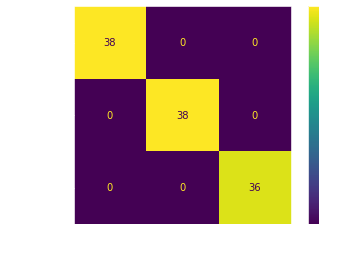

In [18]:
draft_train_CM_display = ConfusionMatrixDisplay(confusion_matrix=draft_train_CM, display_labels=['setosa', 'virginica', 'virsicolor'])
draft_train_CM_display.plot()
plt.show()

In [19]:
# (!) - Score parfait de 1
draft_DT.score(X_train, y_train)

1.0

Synthèse des mesures sur `X_train`

In [20]:
# (!) - 
draft_report = classification_report(y_train, draft_train_predictions)

print(draft_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        38
   virginica       1.00      1.00      1.00        38
  virsicolor       1.00      1.00      1.00        36

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



Prédictions et résultats sur `X_test`

In [21]:
# (!) - 
draft_test_predictions = draft_DT.predict(X_test)

draft_test_predictions

array(['virsicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'virsicolor',
       'virsicolor', 'virsicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virsicolor', 'virginica', 'setosa', 'virsicolor', 'virsicolor',
       'virginica', 'virsicolor', 'virsicolor', 'virsicolor', 'virginica',
       'setosa', 'virsicolor', 'virsicolor', 'setosa', 'virsicolor',
       'setosa', 'setosa', 'virginica'], dtype=object)

Mesures sur `X_test`

In [22]:
# (!) - Légère confusion entre 'virsicolor' et 'virginica'
draft_test_CM = confusion_matrix(y_test, draft_test_predictions, labels=['setosa', 'virginica', 'virsicolor'])

draft_test_CM

array([[12,  0,  0],
       [ 0, 11,  1],
       [ 0,  2, 12]], dtype=int64)

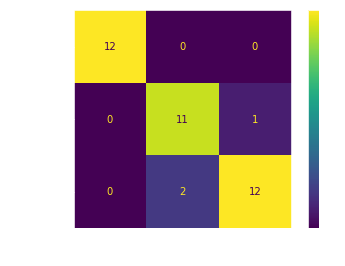

In [23]:
draft_test_CM_display = ConfusionMatrixDisplay(confusion_matrix=draft_test_CM, display_labels=['setosa', 'virginica', 'virsicolor'])
draft_test_CM_display.plot()
plt.show()

In [24]:
# (!) - Score assez bon mais à optimiser
draft_DT.score(X_test, y_test)

0.9210526315789473

Synthèse des mesures sur `X_test`

In [25]:
# (!) - 
draft_test = classification_report(y_test, draft_test_predictions)

print(draft_test)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
   virginica       0.85      0.92      0.88        12
  virsicolor       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



Aperçu final

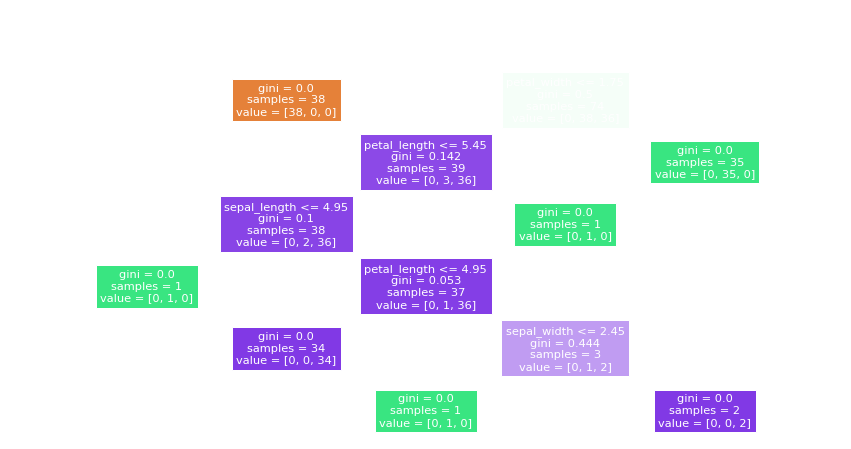

In [26]:
# (!) - 
plt.figure(figsize=(15, 8))
plot_tree(draft_DT, feature_names=X_train.columns, filled=True)
plt.show()

---

### **2.** Modeling

##### **2.1** - Version 2 `max_depth`

Définition et entrainement

In [34]:
# (!) - Entrainement avec un mdoèle limité en profondeur 
v2_DT = DecisionTreeClassifier(max_depth=3)
v2_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Prédictions

In [35]:
# (!) - 
v2_predictions = v2_DT.predict(X_test)

v2_predictions

array(['virsicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'virsicolor', 'setosa', 'virginica', 'setosa', 'virsicolor',
       'virsicolor', 'virsicolor', 'virginica', 'virginica', 'setosa',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'virsicolor', 'virginica', 'setosa', 'virsicolor', 'virsicolor',
       'virginica', 'virsicolor', 'virsicolor', 'virsicolor', 'virginica',
       'setosa', 'virsicolor', 'virsicolor', 'setosa', 'virsicolor',
       'setosa', 'setosa', 'virginica'], dtype=object)

Mesures

In [39]:
# 
v2_CM = confusion_matrix(y_test, v2_predictions, labels=['setosa', 'virginica', 'virsicolor'])

v2_CM

array([[12,  0,  0],
       [ 0, 11,  1],
       [ 0,  1, 13]], dtype=int64)

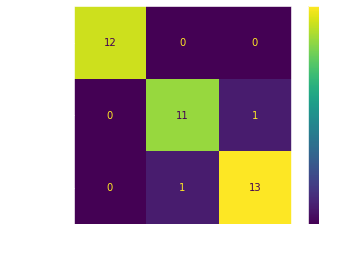

In [40]:
# 
v2_CM_display = ConfusionMatrixDisplay(confusion_matrix=v2_CM, display_labels=['setosa', 'virginica', 'virsicolor'])
v2_CM_display.plot()
plt.show()

In [41]:
# (!) -
v2_DT.score(X_test, y_test)

0.9473684210526315

Synthèse

In [43]:
# (!) -
v2_report = classification_report(y_test, v2_predictions)

print(v2_report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
   virginica       0.92      0.92      0.92        12
  virsicolor       0.93      0.93      0.93        14

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



Aperçu

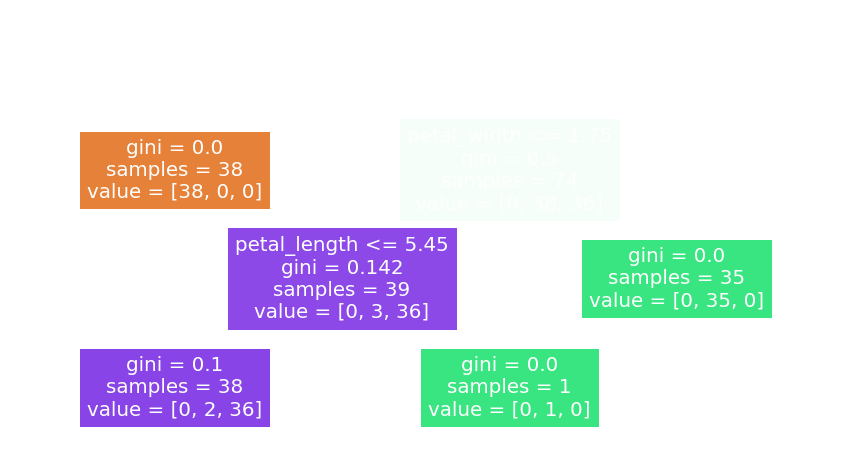

In [42]:
# (!) - 
plt.figure(figsize=(15, 8))
plot_tree(v2_DT, feature_names=X_train.columns, filled=True)
plt.show()

##### **2.2** - Version 3 `GridSearchCV`

Définition et entrainement

In [ ]:
# (!) - 
v3_DT = DecisionTreeClassifier()

In [ ]:
# (!) -
params = {'max_depth': [1, 2, 3, 4], 'criterion': ['gini', 'entropy']}
v3_grid = GridSearchCV(v3_DT, param_grid=params, verbose=1)

v3_grid.fit(X_train, y_train)

---

### **3.** Modeling

Définition et entrainement

Prédictions